# Cyclistic Bike Share - Member vs Casual Rides
## Hamza Shafiq
## Website: "https://hamza811998.github.io/hamzashafiq"

### Guidance from: "Caribou Data Science" https://www.youtube.com/watch?v=pLFuearpUd8
### Data Source: https://divvy-tripdata.s3.amazonaws.com/index.html

In [15]:
from ibis.interactive import *
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
file_paths = ['data/202501-divvy-tripdata.csv', 'data/202502-divvy-tripdata.csv', 'data/202503-divvy-tripdata.csv', 'data/202504-divvy-tripdata.csv',]

In [50]:
raw_data = ibis.read_csv(file_paths).mutate(start_date =_.started_at.cast('date'))

In [51]:
df = raw_data.select(_.start_date, _.rideable_type, _.member_casual)

In [52]:
df.head()

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ start_date ┃ rideable_type ┃ member_casual ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ date       │ string        │ string        │
├────────────┼───────────────┼───────────────┤
│ 2025-01-21 │ classic_bike  │ member        │
│ 2025-01-11 │ electric_bike │ member        │
│ 2025-01-02 │ classic_bike  │ member        │
│ 2025-01-23 │ classic_bike  │ member        │
│ 2025-01-16 │ electric_bike │ member        │
└────────────┴───────────────┴───────────────┘

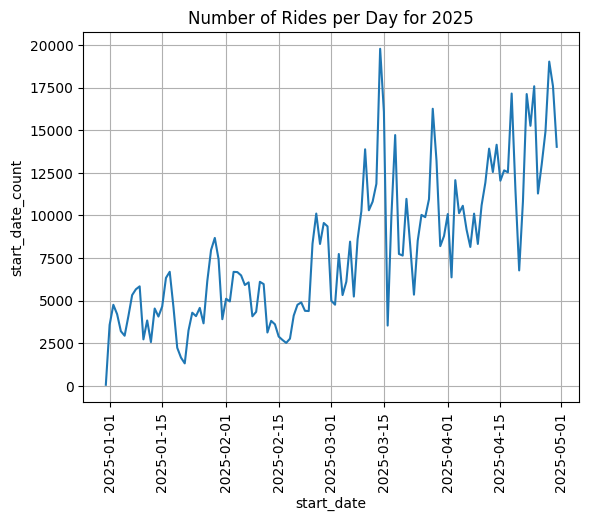

In [57]:
ride_counts = df.start_date.value_counts().order_by('start_date').to_pandas()
sns.lineplot(x='start_date', y='start_date_count', data=ride_counts)
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.grid()
plt.title('Number of Rides per Day for 2025')
plt.show()

In [68]:
date_bike = df.group_by(['start_date', 'rideable_type']).agg(ride_count = _.count()).order_by('start_date', 'rideable_type').to_pandas()
date_bike

,start_date,rideable_type,ride_count
0,2024-12-31,classic_bike,21
1,2024-12-31,electric_bike,32
2,2025-01-01,classic_bike,1282
3,2025-01-01,electric_bike,2280
4,2025-01-02,classic_bike,1816
...,...,...,...
237,2025-04-28,electric_bike,11081
238,2025-04-29,classic_bike,7118
239,2025-04-29,electric_bike,10462
240,2025-04-30,classic_bike,5261


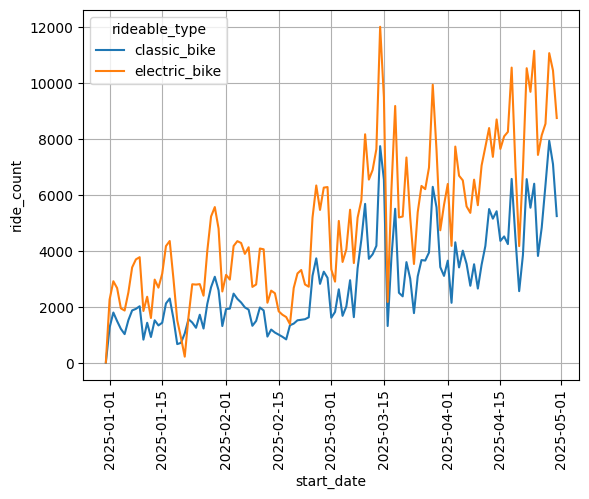

In [70]:
sns.lineplot(x='start_date', y='ride_count', hue='rideable_type', data=date_bike)
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.grid()
plt.show()

In [73]:
membership = df.group_by(['start_date', 'member_casual']).agg(ride_count = _.count()).order_by('start_date', 'member_casual').to_pandas()
membership

,start_date,member_casual,ride_count
0,2024-12-31,casual,37
1,2024-12-31,member,16
2,2025-01-01,casual,1241
3,2025-01-01,member,2321
4,2025-01-02,casual,942
...,...,...,...
237,2025-04-28,member,12526
238,2025-04-29,casual,4847
239,2025-04-29,member,12733
240,2025-04-30,casual,3407


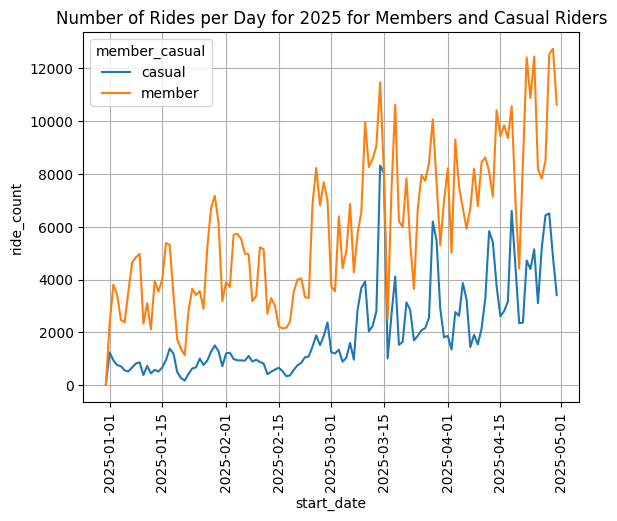

In [75]:
sns.lineplot(x='start_date', y='ride_count', hue='member_casual', data=membership)
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.title('Number of Rides per Day for 2025 for Members and Casual Riders')
plt.grid()
plt.show()